In [6]:
import sys
sys.path.append('../..')

import eeg_decoder
from collections import OrderedDict
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
%load_ext autoreload
%autoreload 2

In [7]:
experiment_name = 'B01'
data_dir = f'./data/{experiment_name}'
exp = eeg_decoder.Experiment(experiment_name,data_dir,dev=False)

In [3]:
ss1,ss3 = [11,21],[13,23]
color,ori = [11,13],[21,23]

In [4]:
time_window = 25 
time_step = 25
trial_average = 15 
n_splits = 10
group_dict = OrderedDict([('SS1',ss1),('SS2',ss3)])
wrangl = eeg_decoder.Wrangler(exp.info['times'],time_window,time_step,trial_average,n_splits,group_dict)
clfr = eeg_decoder.Classification(wrangl,exp.nsub,num_labels=2)

In [5]:
for isub in range(exp.nsub):
    print(isub)
    xdata,ydata = exp.load_eeg(isub)
    ori_idx = ydata>15
    xdata_color,ydata_color = xdata[~ori_idx], ydata[~ori_idx]
    xdata_ori,ydata_ori = xdata[ori_idx], ydata[ori_idx]

    xdata_color,ydata_color = wrangl.group_labels(xdata_color,ydata_color)
    xdata_ori,ydata_ori = wrangl.group_labels(xdata_ori,ydata_ori)

    for X_train_all, X_test_all, y_train, y_test in wrangl.bin_and_custom_split(xdata_ori,xdata_color,ydata_ori,ydata_color,test_size=.3):
        
        X_train_all, X_test_all, y_train, y_test = wrangl.balance_data(X_train_all, X_test_all, y_train, y_test)
        y_test_shuffle = np.random.permutation(y_test)

        for X_train, X_test in wrangl.roll_over_time(X_train_all, X_test_all):
            clfr.decode(X_train,X_test,y_train,y_test,y_test_shuffle,isub)

0
1
2
3
4
5
6
7
8
9
10
11
12


In [6]:
interp_ori_to_color = eeg_decoder.Interpreter(clfr,subtitle='ori_to_color')
# interp_ori_to_color.save_results()

Significant timepoints: [  88  112  136  160  184  208  232  256  280  304  328  352  376  400
  424  448  472  496  520  544  568  592  616  640  664  688  712  736
  760  784  808  832  856  880  904  928  952  976 1000 1024 1048 1072
 1096 1120 1144 1168 1192 1216]


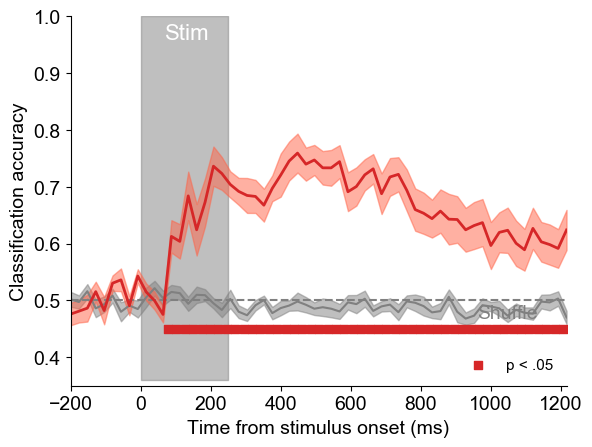

Mean delay accuracy: 0.6726375859912445
Mean delay S.D.: 0.05060911780651569


In [7]:
interp_ori_to_color.plot_acc(significance_testing=True,savefig=False, ylim=[0.35,1],chance_text_y=.22)

# Color to Orientation

In [8]:
for isub in range(exp.nsub):
    print(isub)
    xdata,ydata = exp.load_eeg(isub)
    ori_idx = ydata>15
    xdata_color,ydata_color = xdata[~ori_idx], ydata[~ori_idx]
    xdata_ori,ydata_ori = xdata[ori_idx], ydata[ori_idx]

    xdata_color,ydata_color = wrangl.group_labels(xdata_color,ydata_color)
    xdata_ori,ydata_ori = wrangl.group_labels(xdata_ori,ydata_ori)

    for X_train_all, X_test_all, y_train, y_test in wrangl.bin_and_custom_split(xdata_color,xdata_ori,ydata_color,ydata_ori,test_size=.3):
        
        X_train_all, X_test_all, y_train, y_test = wrangl.balance_data(X_train_all, X_test_all, y_train, y_test)
        y_test_shuffle = np.random.permutation(y_test)

        for X_train, X_test in wrangl.roll_over_time(X_train_all, X_test_all):
            clfr.decode(X_train,X_test,y_train,y_test,y_test_shuffle,isub)

0
1
2
3
4
5
6
7
8
9
10
11
12


In [9]:
interp_color_to_ori = eeg_decoder.Interpreter(clfr,subtitle='color_to_ori')
interp_color_to_ori.save_results()

Significant timepoints: [  88  112  136  160  184  208  232  256  280  304  328  352  376  400
  424  448  472  496  520  544  568  592  616  640  664  688  712  736
  760  784  808  832  856  880  904  928  952  976 1000 1024 1048 1072
 1096 1120 1144 1168 1192 1216]


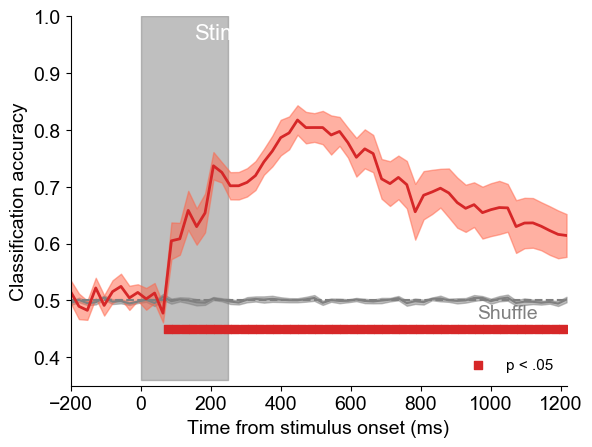

Mean delay accuracy: 0.7091455597248281
Mean delay S.D.: 0.06057602626712234


In [10]:
interp_color_to_ori.plot_acc(significance_testing=True,savefig=False, ylim=[0.35,1],chance_text_y=.22)

# Within-Feature compared to Across-Feature

## Color

In [ ]:
interp_color = eeg_decoder.Interpreter()
interp_color.combine_interps(['color','ori_to_color'], overwrite_current_interp=True)

Within-color mean delay accuracy: 0.6916823014383989
Within-color mean delay S.D.: 0.05938315568333715
Orientation-to-color mean delay accuracy: 0.6772682926829269
Orientation-to-color mean delay S.D.: 0.05730909829295534
mean delay accuracy: 0.6772682926829269
mean delay S.D.: 0.05730909829295534


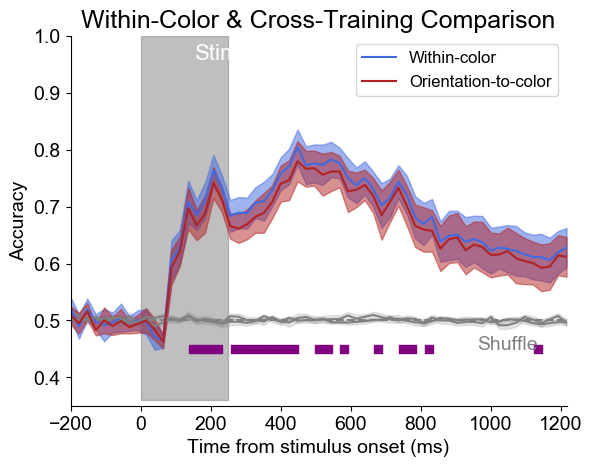

In [56]:
interp_color.plot_acc_compare_subset(
    subset_list=['Within-color','Orientation-to-color'],
    ylim=[.35,1], 
    chance=.5, 
    significance_testing=True,
    subtitle='within_color_and_ori_to_color',
    title='Within-Color & Cross-Training Comparison',
    savefig=False)

## Orientation 

In [58]:
interp_ori = eeg_decoder.Interpreter()
interp_ori.combine_interps(['orientation','color_to_ori'])

Within-orientation mean delay accuracy: 0.7233896185115697
Within-orientation mean delay S.D.: 0.061110760285524354
Color-to-orientation mean delay accuracy: 0.7091455597248281
Color-to-orientation mean delay S.D.: 0.06057602626712234
mean delay accuracy: 0.7091455597248281
mean delay S.D.: 0.06057602626712234


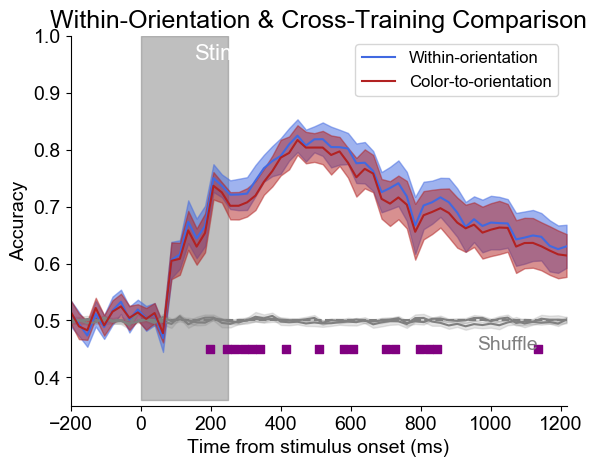

In [59]:
interp_ori.plot_acc_compare_subset(
    subset_list=['Within-orientation','Color-to-orientation'],
    ylim=[.35,1], 
    chance=.5, 
    significance_testing=True,
    subtitle='within_ori_and_color_to_ori',
    title='Within-Orientation & Cross-Training Comparison',
    savefig=False)